# 📓 Notebook: Inicio de Proyecto de Investigación Formativa
# "Desarrollo de una Mini Librería de Lógica Difusa en Python"

## 📅 Semana 1: Construcción de bases con NumPy y Programación Orientada a Objetos (POO)

## 🔄 Contexto Inicial

> Aplicaremos conceptos de Programación Orientada a Objetos y manipulación de arrays en NumPy para iniciar el desarrollo de una librería de lógica difusa.

**Objetivo:**
- Crear clases básicas para representar conjuntos difusos y funciones de membresía.
- Utilizar NumPy para operar sobre datos de forma eficiente.

## 🔹 Sección 1: Repaso de Creación y Manipulación de Arrays

Valores: [ 0  1  2  3  4  5  6  7  8  9 10]
Membresía Triangular: [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]


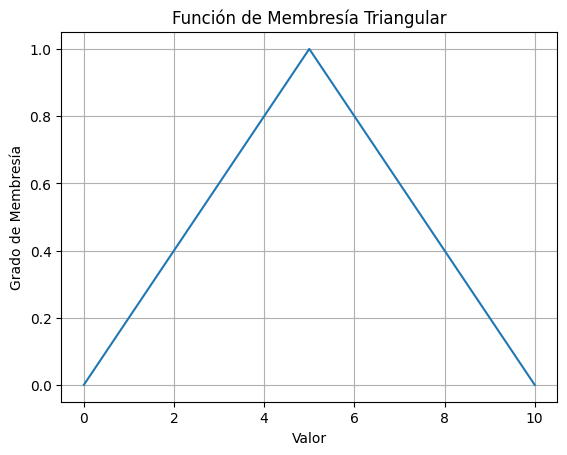

In [1]:
import numpy as np

# Crear un array de 0 a 10
valores = np.arange(0, 11)
print("Valores:", valores)

# Aplicar una función de membresía triangular simple
membresia = np.maximum(1 - np.abs(valores - 5)/5, 0)
print("Membresía Triangular:", membresia)

# Graficar (requiere matplotlib)
import matplotlib.pyplot as plt

plt.plot(valores, membresia)
plt.title("Función de Membresía Triangular")
plt.xlabel("Valor")
plt.ylabel("Grado de Membresía")
plt.grid(True)
plt.show()

## 🔹 Sección 2: Definiendo la clase `FuzzySet`

In [2]:
class FuzzySet:
    def __init__(self, universe, membership_function):
        self.universe = np.array(universe)
        self.membership_function = membership_function
        self.membership_values = self.calculate_membership()

    def calculate_membership(self):
        return np.array([self.membership_function(x) for x in self.universe])

    def plot(self):
        plt.plot(self.universe, self.membership_values)
        plt.title("Fuzzy Set")
        plt.xlabel("Universe")
        plt.ylabel("Membership Degree")
        plt.grid(True)
        plt.show()



In [ ]:
# Ejemplo de uso:
def triangular(x, a=3, b=5, c=7):
    return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)

universo = np.linspace(0, 10, 100)
fuzzy_example = FuzzySet(universo, lambda x: triangular(x, 3, 5, 7))
fuzzy_example.plot()

## 🔹 Sección 3: Actividades para los estudiantes

### ✏️ Actividad 1:
> Crear otra clase llamada `MembershipFunction` que permita definir funciones triangulares o trapezoidales.

In [3]:
class MembershipFunction:
    def __init__(self, tipo, *puntos):
        self.tipo = tipo.lower()
        self.puntos = puntos

        if self.tipo == "triangular" and len(puntos) != 3:
            raise ValueError("Una función triangular debe tener exactamente 3 puntos (a, b, c).")
        elif self.tipo == "trapezoidal" and len(puntos) != 4:
            raise ValueError("Una función trapezoidal debe tener exactamente 4 puntos (a, b, c, d).")

    def evaluar(self, x):
        if self.tipo == "triangular":
            a, b, c = self.puntos
            if x <= a or x >= c:
                return 0.0
            elif a < x < b:
                return (x - a) / (b - a)
            elif b <= x < c:
                return (c - x) / (c - b)
            elif x == b:
                return 1.0

        elif self.tipo == "trapezoidal":
            a, b, c, d = self.puntos
            if x <= a or x >= d:
                return 0.0
            elif a < x < b:
                return (x - a) / (b - a)
            elif b <= x <= c:
                return 1.0
            elif c < x < d:
                return (d - x) / (d - c)

        else:
            raise ValueError("Tipo de función desconocido.")
# Función triangular con vértices a=0, b=5, c=10
tri = MembershipFunction("triangular", 0, 5, 10)

# Función trapezoidal con puntos a=0, b=3, c=7, d=10
trap = MembershipFunction("trapezoidal", 0, 3, 7, 10)

# Evaluación de algunos valores
print(tri.evaluar(5))   # → 1.0
print(tri.evaluar(2.5)) # → 0.5
print(trap.evaluar(5))  # → 1.0
print(trap.evaluar(9))  # → 0.25


1.0
0.5
1.0
0.3333333333333333


### ✏️ Actividad 2:
Crear un conjunto difuso que modele el concepto "Temperatura Alta" en el rango de 0 a 100.




In [4]:
# Usamos la clase previamente definida
temperatura_alta = MembershipFunction("trapezoidal", 60, 70, 90, 100)
for temp in [50, 65, 75, 85, 95]:
    pertenencia = temperatura_alta.evaluar(temp)
    print(f"Temperatura: {temp} → pertenencia: {pertenencia:.2f}")


Temperatura: 50 → pertenencia: 0.00
Temperatura: 65 → pertenencia: 0.50
Temperatura: 75 → pertenencia: 1.00
Temperatura: 85 → pertenencia: 1.00
Temperatura: 95 → pertenencia: 0.50


### ✏️ Actividad 3:
> Investigar qué es la **operación de corte** (alpha-cut) en conjuntos difusos y cómo se podría implementar en NumPy.

In [5]:
x = [1, 2, 3, 4, 5]
mu_A = [0.1, 0.4, 0.6, 0.9, 0.2]
import numpy as np

# Valores del universo
x = np.array([1, 2, 3, 4, 5])
# Grados de pertenencia
mu_A = np.array([0.1, 0.4, 0.6, 0.9, 0.2])

# Valor de alfa
alpha = 0.5

# Aplicación del α-corte
A_alpha = x[mu_A >= alpha]

print("α-corte (alpha = 0.5):", A_alpha)


α-corte (alpha = 0.5): [3 4]


## 🔹 Sección 4: Reflexión Final

- ¿Cómo ayuda NumPy en la manipulación eficiente de datos para sistemas difusos?
- ¿Por qué usar objetos y clases mejora la organización del código en proyectos científicos?


⏳ *Próxima sesión: Operaciones entre conjuntos difusos: intersección, unión y complementación usando NumPy.*


1.NumPy facilita la manipulación eficiente de datos en sistemas difusos gracias a su capacidad para realizar operaciones vectorizadas, lo que significa que se pueden aplicar funciones y filtros a grandes cantidades de datos sin necesidad de bucles explícitos. Esto no solo mejora el rendimiento y la velocidad de cálculo, sino que también hace que el código sea más conciso y legible.

En el contexto de conjuntos difusos, NumPy permite:

Representar funciones de pertenencia como arrays.

Realizar cortes difusos (α-cortes) de manera rápida.

Combinar o comparar conjuntos mediante operaciones lógicas o matemáticas a nivel de array.  

2.El uso de objetos y clases en programación (paradigma orientado a objetos) permite organizar mejor el código, especialmente en proyectos científicos donde suele haber:

Múltiples tipos de entidades (por ejemplo, conjuntos difusos, funciones, reglas).

Necesidad de reutilizar operaciones (como cortes, uniones o evaluaciones).

Proyectos con crecimiento potencial y múltiples módulos.